In [31]:
import os
from tqdm import tqdm
from glob import glob

import numpy as np
import pandas as pd

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
def calculate_moments(image):
    mean = np.mean(image)
    std_dev = np.std(image)
    skewness = np.mean((image - mean) ** 3) / (std_dev ** 3)
    kurtosis = np.mean((image - mean) ** 4) / (std_dev ** 4) - 3
    
    return mean, std_dev, skewness, kurtosis

# HSV Color Space

In [33]:
def extract_color_features(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Extract moments for each HSV component
    h_mean, h_std, h_skewness, h_kurtosis = calculate_moments(hsv_image[:,:,0])
    s_mean, s_std, s_skewness, s_kurtosis = calculate_moments(hsv_image[:,:,1])
    v_mean, v_std, v_skewness, v_kurtosis = calculate_moments(hsv_image[:,:,2])

    return [h_mean, h_std, h_skewness, h_kurtosis,
            s_mean, s_std, s_skewness, s_kurtosis,
            v_mean, v_std, v_skewness, v_kurtosis]

In [34]:
# Image directories
nickels_cropped_dir = "./nickels_cropped/"
nickels_cropped_files = glob(f"{nickels_cropped_dir}/*")

quarters_cropped_dir = "./quarters_cropped/"
quarters_cropped_files = glob(f"{quarters_cropped_dir}/*")

cents_cropped_dir = "./cents_cropped/"
cents_cropped_files = glob(f"{cents_cropped_dir}/*")

In [35]:
c_feats = []
for file in tqdm(nickels_cropped_files):
    img = np.asarray(Image.open(file))
    c_feats.append(extract_color_features(img))

color_features_df = pd.DataFrame({"img": nickels_cropped_files, "color_features": c_feats})
color_features_df['img'] = color_features_df['img'].apply(lambda x: os.path.basename(x))

nickels_df = pd.DataFrame(color_features_df["color_features"].to_list(), columns = ['h_mean', 'h_std', 'h_skewness', 
                                                                                    'h_kurtosis', 's_mean', 's_std', 
                                                                                    's_skewness', 's_kurtosis', 'v_mean', 
                                                                                    'v_std', 'v_skewness', 'v_kurtosis'])
nickels_df['img'] = color_features_df['img']

nickels_df.to_parquet('./processed_dfs/extract_features_3_color_feats_nickels.parquet')
nickels_df

100%|██████████| 1133/1133 [01:22<00:00, 13.79it/s]


,h_mean,h_std,h_skewness,h_kurtosis,s_mean,s_std,s_skewness,s_kurtosis,v_mean,v_std,v_skewness,v_kurtosis,img
0,34.912982,49.425402,1.536042,1.103172,36.779677,48.776131,2.485138,7.707696,62.179383,66.490397,1.179582,0.846069,Jefferson Nickel 177303_0 Obverse.jpg
1,15.192815,20.212510,4.750719,27.640190,119.280534,77.324156,-0.340664,-1.033499,90.463499,72.630385,0.418324,-0.693313,Jefferson Nickel 177303_1 Obverse.jpg
2,18.222754,18.947552,3.778876,23.678416,77.671726,61.022187,0.363980,-0.057632,59.674764,53.441376,0.948860,1.080395,Jefferson Nickel 177303_10 Obverse.jpg
3,13.941320,16.093284,4.565348,31.444495,92.949518,69.776854,-0.137195,-0.918098,64.038939,51.467725,0.051462,-0.850299,Jefferson Nickel 177303_100 Reverse.jpg
4,15.664649,17.991799,4.742764,29.897838,130.610471,83.050445,-0.702247,-1.050464,68.707073,53.554933,0.303945,-0.386744,Jefferson Nickel 177303_101 Obverse.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,25.825453,38.907431,2.736097,6.714168,34.734443,40.080159,2.876382,11.768106,100.351186,74.823416,0.221434,-0.848846,Jefferson Nickel 90905_95 Obverse.jpg
1129,54.259053,55.491551,0.732846,-0.928052,20.675408,37.534087,4.347663,22.006946,96.211488,70.559090,0.231789,-0.718422,Jefferson Nickel 90905_96 Reverse.jpg
1130,23.160612,35.748295,3.162340,9.220414,58.525935,47.760211,1.268375,3.476869,115.032563,78.292726,-0.078432,-0.999305,Jefferson Nickel 90905_97 Obverse.jpg
1131,36.088159,45.386160,1.473007,1.034938,21.346890,40.493776,4.414760,21.638769,105.576414,85.914376,0.098073,-1.252530,Jefferson Nickel 90905_98 Obverse.jpg


In [36]:
c_feats_quarters = []
for file in tqdm(quarters_cropped_files):
    img = np.asarray(Image.open(file))
    c_feats_quarters.append(extract_color_features(img))

color_features_quarters_df = pd.DataFrame({"img": quarters_cropped_files, "color_features": c_feats_quarters})
color_features_quarters_df['img'] = color_features_quarters_df['img'].apply(lambda x: os.path.basename(x))

quarters_df = pd.DataFrame(color_features_quarters_df["color_features"].to_list(), columns = ['h_mean', 'h_std', 'h_skewness', 
                                                                                              'h_kurtosis', 's_mean', 's_std', 
                                                                                              's_skewness', 's_kurtosis', 'v_mean', 
                                                                                              'v_std', 'v_skewness', 'v_kurtosis'])
quarters_df['img'] = color_features_quarters_df['img']

quarters_df.to_parquet('./processed_dfs/extract_features_3_color_feats_quarters.parquet')
quarters_df

100%|██████████| 799/799 [01:11<00:00, 11.10it/s]


,h_mean,h_std,h_skewness,h_kurtosis,s_mean,s_std,s_skewness,s_kurtosis,v_mean,v_std,v_skewness,v_kurtosis,img
0,24.195360,49.066560,2.451704,4.275077,20.571248,31.492342,5.670451,38.156934,136.238375,89.112525,-0.574258,-1.247451,Washington Quarter 1 11_2.jpg
1,60.568075,78.292680,0.620829,-1.556382,19.099357,40.785482,4.741803,23.559976,112.693643,87.289516,-0.323570,-1.618002,Washington Quarter 1 11_3.jpg
2,15.317478,13.752790,3.621365,32.825701,71.140264,57.599579,0.453923,0.163399,100.502986,81.481244,0.037240,-1.403544,Washington Quarter 1 12_1.jpg
3,16.801500,15.565648,2.854930,19.400113,59.213723,51.412444,0.734569,0.798941,103.622722,83.636569,0.007843,-1.426670,Washington Quarter 1 12_2.jpg
4,29.523662,54.195845,2.088530,2.598658,24.117073,35.435709,4.690359,26.828814,134.283753,86.267511,-0.472288,-1.274286,Washington Quarter 1 14_1.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,13.832682,13.621458,4.725199,46.495341,28.346856,31.046631,2.696421,13.613401,96.275278,71.934701,-0.168004,-1.327399,Washington Quarter 9 25_0.jpg
795,19.758959,20.837625,2.699581,12.395397,16.223176,20.298308,5.622942,56.894297,103.720628,75.307486,-0.306792,-1.386534,Washington Quarter 9 25_1.jpg
796,16.611353,21.218447,4.154697,21.614789,71.093853,52.895761,0.243846,0.026758,126.209428,84.729278,-0.258743,-1.179459,Washington Quarter 9 5_0.jpg
797,16.127973,22.928088,4.259713,21.265872,73.236775,54.784823,0.169969,-0.385049,123.381326,81.818234,-0.272192,-1.091685,Washington Quarter 9 5_1.jpg


In [37]:
c_feats_cents = []
for file in tqdm(cents_cropped_files):
    img = np.asarray(Image.open(file))
    c_feats_cents.append(extract_color_features(img))

color_features_cents_df = pd.DataFrame({"img": cents_cropped_files, "color_features": c_feats_cents})
color_features_cents_df['img'] = color_features_cents_df['img'].apply(lambda x: os.path.basename(x))

cents_df = pd.DataFrame(color_features_cents_df["color_features"].to_list(), columns = ['h_mean', 'h_std', 'h_skewness', 
                                                                                        'h_kurtosis', 's_mean', 's_std', 
                                                                                        's_skewness', 's_kurtosis', 'v_mean', 
                                                                                        'v_std', 'v_skewness', 'v_kurtosis'])
cents_df['img'] = color_features_cents_df['img']

cents_df.to_parquet('./processed_dfs/extract_features_3_color_feats_cents.parquet')
cents_df

100%|██████████| 1161/1161 [01:08<00:00, 16.87it/s]


,h_mean,h_std,h_skewness,h_kurtosis,s_mean,s_std,s_skewness,s_kurtosis,v_mean,v_std,v_skewness,v_kurtosis,img
0,19.075531,38.712505,3.005719,8.117864,119.273575,90.295544,0.163302,-1.236256,61.561741,64.600894,1.292088,1.228206,Lincoln Cent 107258_0 Reverse.jpg
1,17.489747,28.647303,3.686125,13.989261,83.499652,68.196100,0.769009,0.580440,100.565462,78.303567,-0.079575,-1.250356,Lincoln Cent 107258_1 Reverse.jpg
2,23.054999,42.597754,2.632454,5.746870,89.836538,80.100246,0.688503,-0.484048,78.476656,91.072040,0.852814,-0.872008,Lincoln Cent 107258_10 Reverse.jpg
3,24.459467,45.148715,2.513755,5.092094,113.229027,83.644978,0.244044,-0.927555,84.221653,81.842062,0.726652,-0.684180,Lincoln Cent 107258_100 Reverse.jpg
4,19.054386,38.620301,3.158510,9.054377,113.780429,85.302785,0.189434,-1.014517,89.999708,88.142903,0.626733,-1.043205,Lincoln Cent 107258_101 Reverse.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,16.477225,30.579675,3.887326,15.226098,88.121363,66.045105,0.576766,0.349155,77.687150,86.190561,0.872139,-0.831526,Lincoln Cent 69935_94 Obverse.jpg
1157,12.458681,21.919505,4.808776,25.011056,144.300706,80.667891,-0.868848,-0.471002,94.001319,79.469272,0.477822,-0.896944,Lincoln Cent 69935_95 Reverse.jpg
1158,15.980744,26.327165,4.312295,19.945097,108.864506,67.737117,-0.091134,-0.289864,87.882094,90.150138,0.618810,-1.318374,Lincoln Cent 69935_96 Obverse.jpg
1159,13.529356,21.011548,4.582628,23.197718,135.285037,76.750237,-0.807639,-0.469346,115.565462,85.491435,-0.014386,-1.160932,Lincoln Cent 69935_97 Obverse.jpg


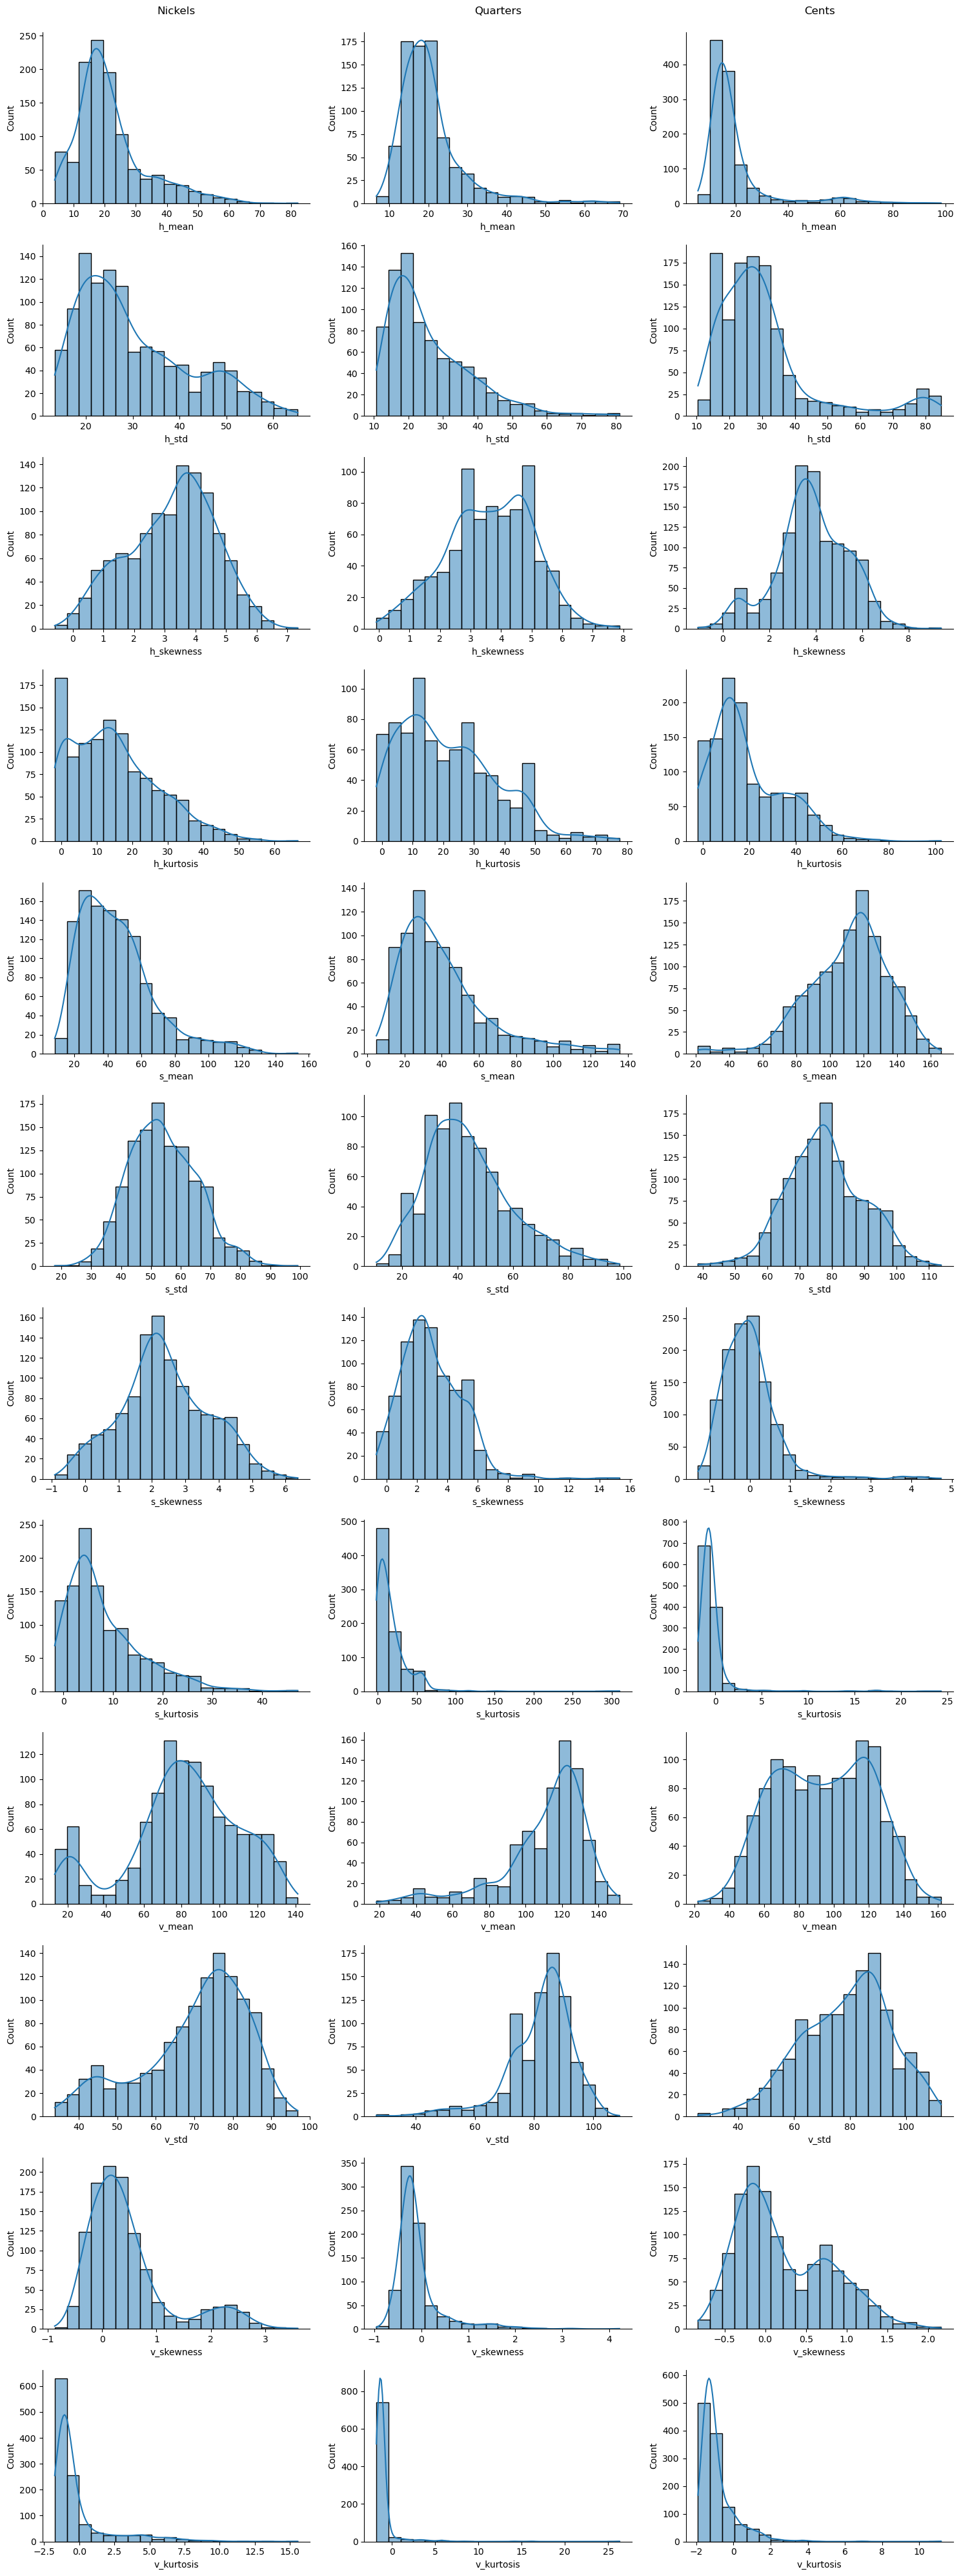

In [45]:
fig, axs = plt.subplots(12, 3, figsize = (15, 40))

dfs = [nickels_df, quarters_df, cents_df]
titles = ['Nickels', 'Quarters', 'Cents']
feature_names = ['h_mean', 'h_std', 'h_skewness', 'h_kurtosis',
                 's_mean', 's_std', 's_skewness', 's_kurtosis',
                 'v_mean', 'v_std', 'v_skewness', 'v_kurtosis']

for i, df in enumerate(dfs):
    for j, column in enumerate(feature_names):
        ax = axs[j, i]
        sns.histplot(df, x = column, 
                     bins = 20, kde = True, ax = ax)
        ax.spines[['top', 'right']].set_visible(False)
    axs[0, i].set_title(titles[i], pad=20)

plt.tight_layout()
plt.show()

In [46]:
nickels_df['img_type'] = 'Nickels'
quarters_df['img_type'] = 'Quarters'
cents_df['img_type'] = 'Cents'
df_color_features = pd.concat([nickels_df, quarters_df, cents_df], ignore_index = True)

df_color_features

,h_mean,h_std,h_skewness,h_kurtosis,s_mean,s_std,s_skewness,s_kurtosis,v_mean,v_std,v_skewness,v_kurtosis,img,img_type
0,34.912982,49.425402,1.536042,1.103172,36.779677,48.776131,2.485138,7.707696,62.179383,66.490397,1.179582,0.846069,Jefferson Nickel 177303_0 Obverse.jpg,Nickels
1,15.192815,20.212510,4.750719,27.640190,119.280534,77.324156,-0.340664,-1.033499,90.463499,72.630385,0.418324,-0.693313,Jefferson Nickel 177303_1 Obverse.jpg,Nickels
2,18.222754,18.947552,3.778876,23.678416,77.671726,61.022187,0.363980,-0.057632,59.674764,53.441376,0.948860,1.080395,Jefferson Nickel 177303_10 Obverse.jpg,Nickels
3,13.941320,16.093284,4.565348,31.444495,92.949518,69.776854,-0.137195,-0.918098,64.038939,51.467725,0.051462,-0.850299,Jefferson Nickel 177303_100 Reverse.jpg,Nickels
4,15.664649,17.991799,4.742764,29.897838,130.610471,83.050445,-0.702247,-1.050464,68.707073,53.554933,0.303945,-0.386744,Jefferson Nickel 177303_101 Obverse.jpg,Nickels
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,16.477225,30.579675,3.887326,15.226098,88.121363,66.045105,0.576766,0.349155,77.687150,86.190561,0.872139,-0.831526,Lincoln Cent 69935_94 Obverse.jpg,Cents
3089,12.458681,21.919505,4.808776,25.011056,144.300706,80.667891,-0.868848,-0.471002,94.001319,79.469272,0.477822,-0.896944,Lincoln Cent 69935_95 Reverse.jpg,Cents
3090,15.980744,26.327165,4.312295,19.945097,108.864506,67.737117,-0.091134,-0.289864,87.882094,90.150138,0.618810,-1.318374,Lincoln Cent 69935_96 Obverse.jpg,Cents
3091,13.529356,21.011548,4.582628,23.197718,135.285037,76.750237,-0.807639,-0.469346,115.565462,85.491435,-0.014386,-1.160932,Lincoln Cent 69935_97 Obverse.jpg,Cents


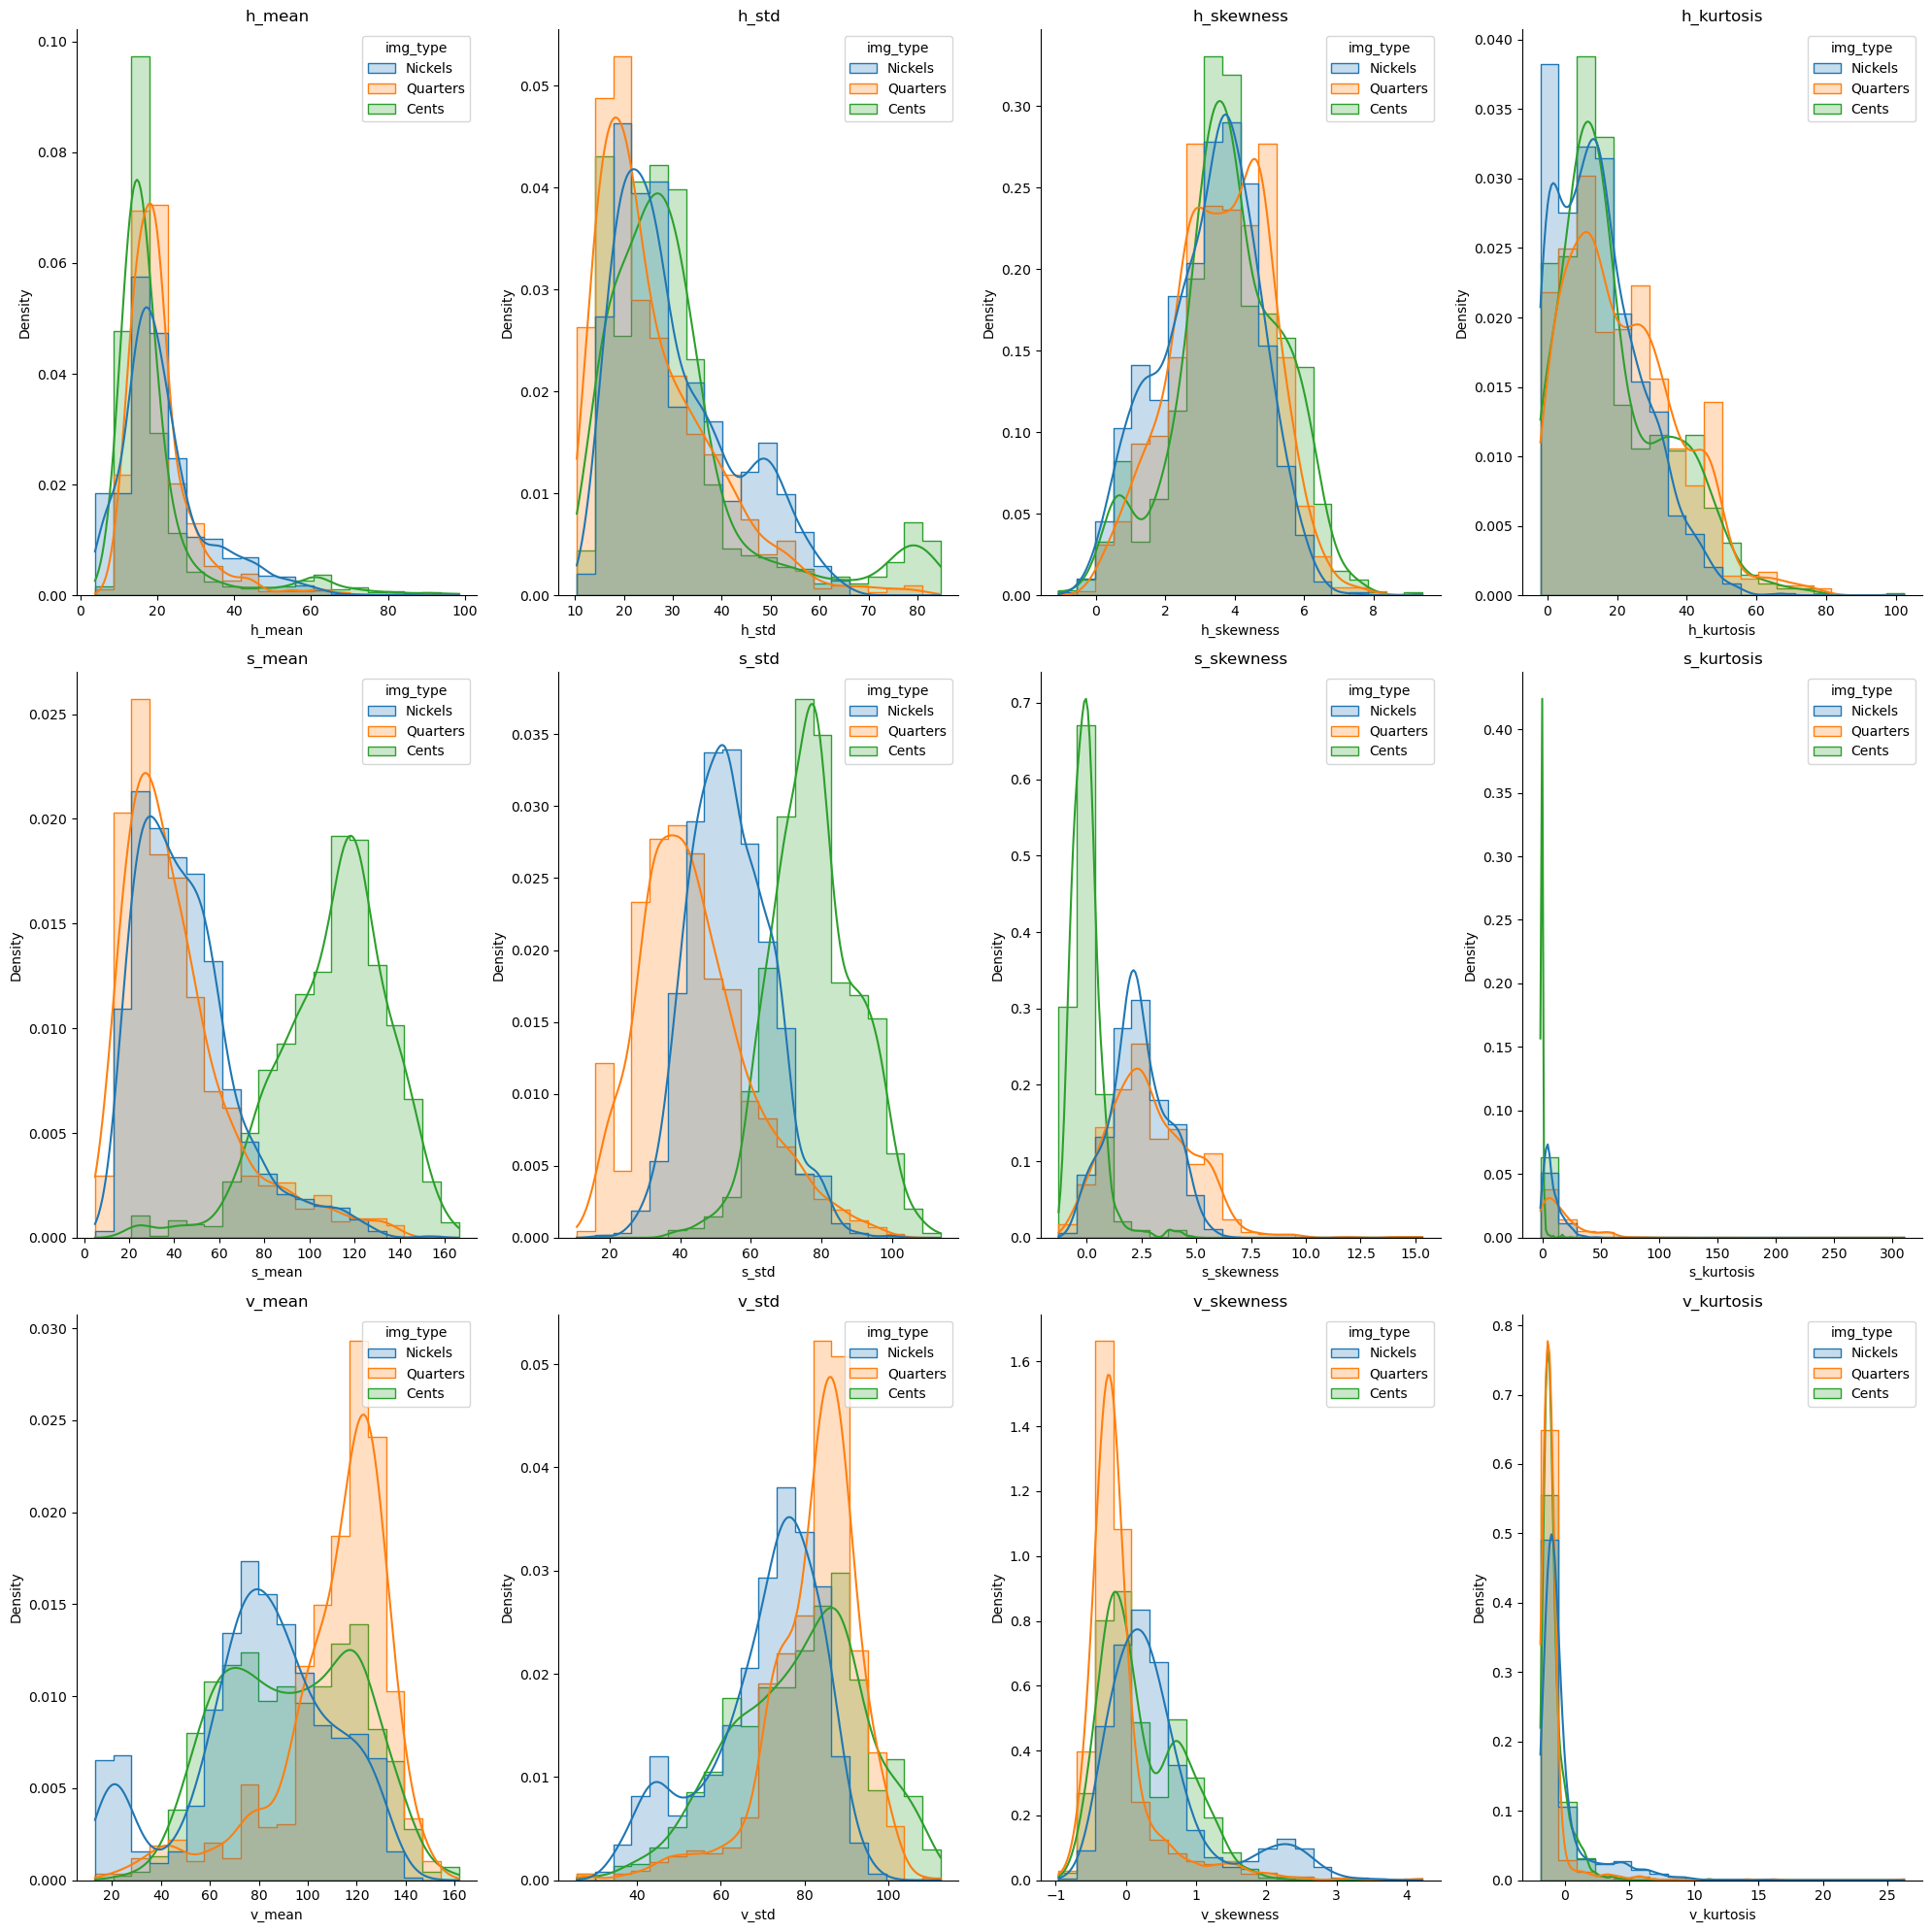

In [55]:
fig, axs = plt.subplots(3, 4, figsize = (20, 20))

feature_names = ['h_mean', 'h_std', 'h_skewness', 'h_kurtosis',
                 's_mean', 's_std', 's_skewness', 's_kurtosis',
                 'v_mean', 'v_std', 'v_skewness', 'v_kurtosis']

for i, feature in enumerate(feature_names):
    ax = axs.flatten()[i]
    
    sns.histplot(data = df_color_features, x = feature, hue = 'img_type', 
                 element = 'step', stat = 'density', common_norm = False,
                 bins = 20, kde = True, ax = ax)
    
    ax.set_title(feature)    
    ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

# HSL and LAB Color Space

In [63]:
def extract_color_features_2(image):
    hsl_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    # Extract moments for each HSL component
    hsl_h_mean, hsl_h_std, hsl_h_skewness, hsl_h_kurtosis = calculate_moments(hsl_image[:, :, 0])
    hsl_s_mean, hsl_s_std, hsl_s_skewness, hsl_s_kurtosis = calculate_moments(hsl_image[:, :, 1])
    hsl_l_mean, hsl_l_std, hsl_l_skewness, hsl_l_kurtosis = calculate_moments(hsl_image[:, :, 2])

    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    # Extract moments for each LAB component
    lab_l_mean, lab_l_std, lab_l_skewness, lab_l_kurtosis = calculate_moments(lab_image[:, :, 0])
    lab_a_mean, lab_a_std, lab_a_skewness, lab_a_kurtosis = calculate_moments(lab_image[:, :, 1])
    lab_b_mean, lab_b_std, lab_b_skewness, lab_b_kurtosis = calculate_moments(lab_image[:, :, 2])

    return [hsl_h_mean, hsl_h_std, hsl_h_skewness, hsl_h_kurtosis,
            hsl_s_mean, hsl_s_std, hsl_s_skewness, hsl_s_kurtosis,
            hsl_l_mean, hsl_l_std, hsl_l_skewness, hsl_l_kurtosis,
            lab_l_mean, lab_l_std, lab_l_skewness, lab_l_kurtosis,
            lab_a_mean, lab_a_std, lab_a_skewness, lab_a_kurtosis,
            lab_b_mean, lab_b_std, lab_b_skewness, lab_b_kurtosis]

In [61]:
c_feats_nickels = []
cols = ['hsl_h_mean', 'hsl_h_std', 'hsl_h_skewness', 'hsl_h_kurtosis',
        'hsl_s_mean', 'hsl_s_std', 'hsl_s_skewness', 'hsl_s_kurtosis',
        'hsl_l_mean', 'hsl_l_std', 'hsl_l_skewness', 'hsl_l_kurtosis',
        'lab_l_mean', 'lab_l_std', 'lab_l_skewness', 'lab_l_kurtosis',
        'lab_a_mean', 'lab_a_std', 'lab_a_skewness', 'lab_a_kurtosis',
        'lab_b_mean', 'lab_b_std', 'lab_b_skewness', 'lab_b_kurtosis']

for file in tqdm(nickels_cropped_files):
    img = np.asarray(Image.open(file))
    c_feats_nickels.append(extract_color_features_2(img))

color_features_df_nickels = pd.DataFrame({"img": nickels_cropped_files, "color_features": c_feats_nickels})
color_features_df_nickels['img'] = color_features_df_nickels['img'].apply(lambda x: os.path.basename(x))

100%|██████████| 1133/1133 [02:39<00:00,  7.11it/s]


ValueError: 24 columns passed, passed data had 12 columns

In [67]:
nickels_df = pd.DataFrame(color_features_df_nickels["color_features"].to_list(), columns = cols)
nickels_df['img'] = color_features_df_nickels['img']
nickels_df['img_type'] = 'Nickels'

nickels_df.to_parquet('./processed_dfs/extract_features_color_feats_nickels_hsl_and_lab.parquet')

In [75]:
c_feats_quarters = []
for file in tqdm(quarters_cropped_files):
    img = np.asarray(Image.open(file))
    c_feats_quarters.append(extract_color_features_2(img))

color_features_df_quarters = pd.DataFrame({"img": quarters_cropped_files, "color_features": c_feats_quarters})
color_features_df_quarters['img'] = color_features_df_quarters['img'].apply(lambda x: os.path.basename(x))

quarters_df = pd.DataFrame(color_features_df_quarters["color_features"].to_list(), columns = cols)
quarters_df['img'] = color_features_df_quarters['img']
quarters_df['img_type'] = 'Quarters'

quarters_df.to_parquet('./processed_dfs/extract_features_color_feats_quarters_hsl_and_lab.parquet')

100%|██████████| 799/799 [02:20<00:00,  5.67it/s]


In [76]:
c_feats_cents = []
for file in tqdm(cents_cropped_files):
    img = np.asarray(Image.open(file))
    c_feats_cents.append(extract_color_features_2(img))

color_features_df_cents = pd.DataFrame({"img": cents_cropped_files, "color_features": c_feats_cents})
color_features_df_cents['img'] = color_features_df_cents['img'].apply(lambda x: os.path.basename(x))

cents_df = pd.DataFrame(color_features_df_cents["color_features"].to_list(), columns = cols)
cents_df['img'] = color_features_df_cents['img']
cents_df['img_type'] = 'Cents'

cents_df.to_parquet('./processed_dfs/extract_features_color_feats_cents_hsl_and_lab.parquet')

100%|██████████| 1161/1161 [02:18<00:00,  8.37it/s]


In [78]:
df_hsl_lab_features = pd.concat([nickels_df, quarters_df, cents_df], ignore_index = True)
df_hsl_lab_features.shape

(3093, 26)

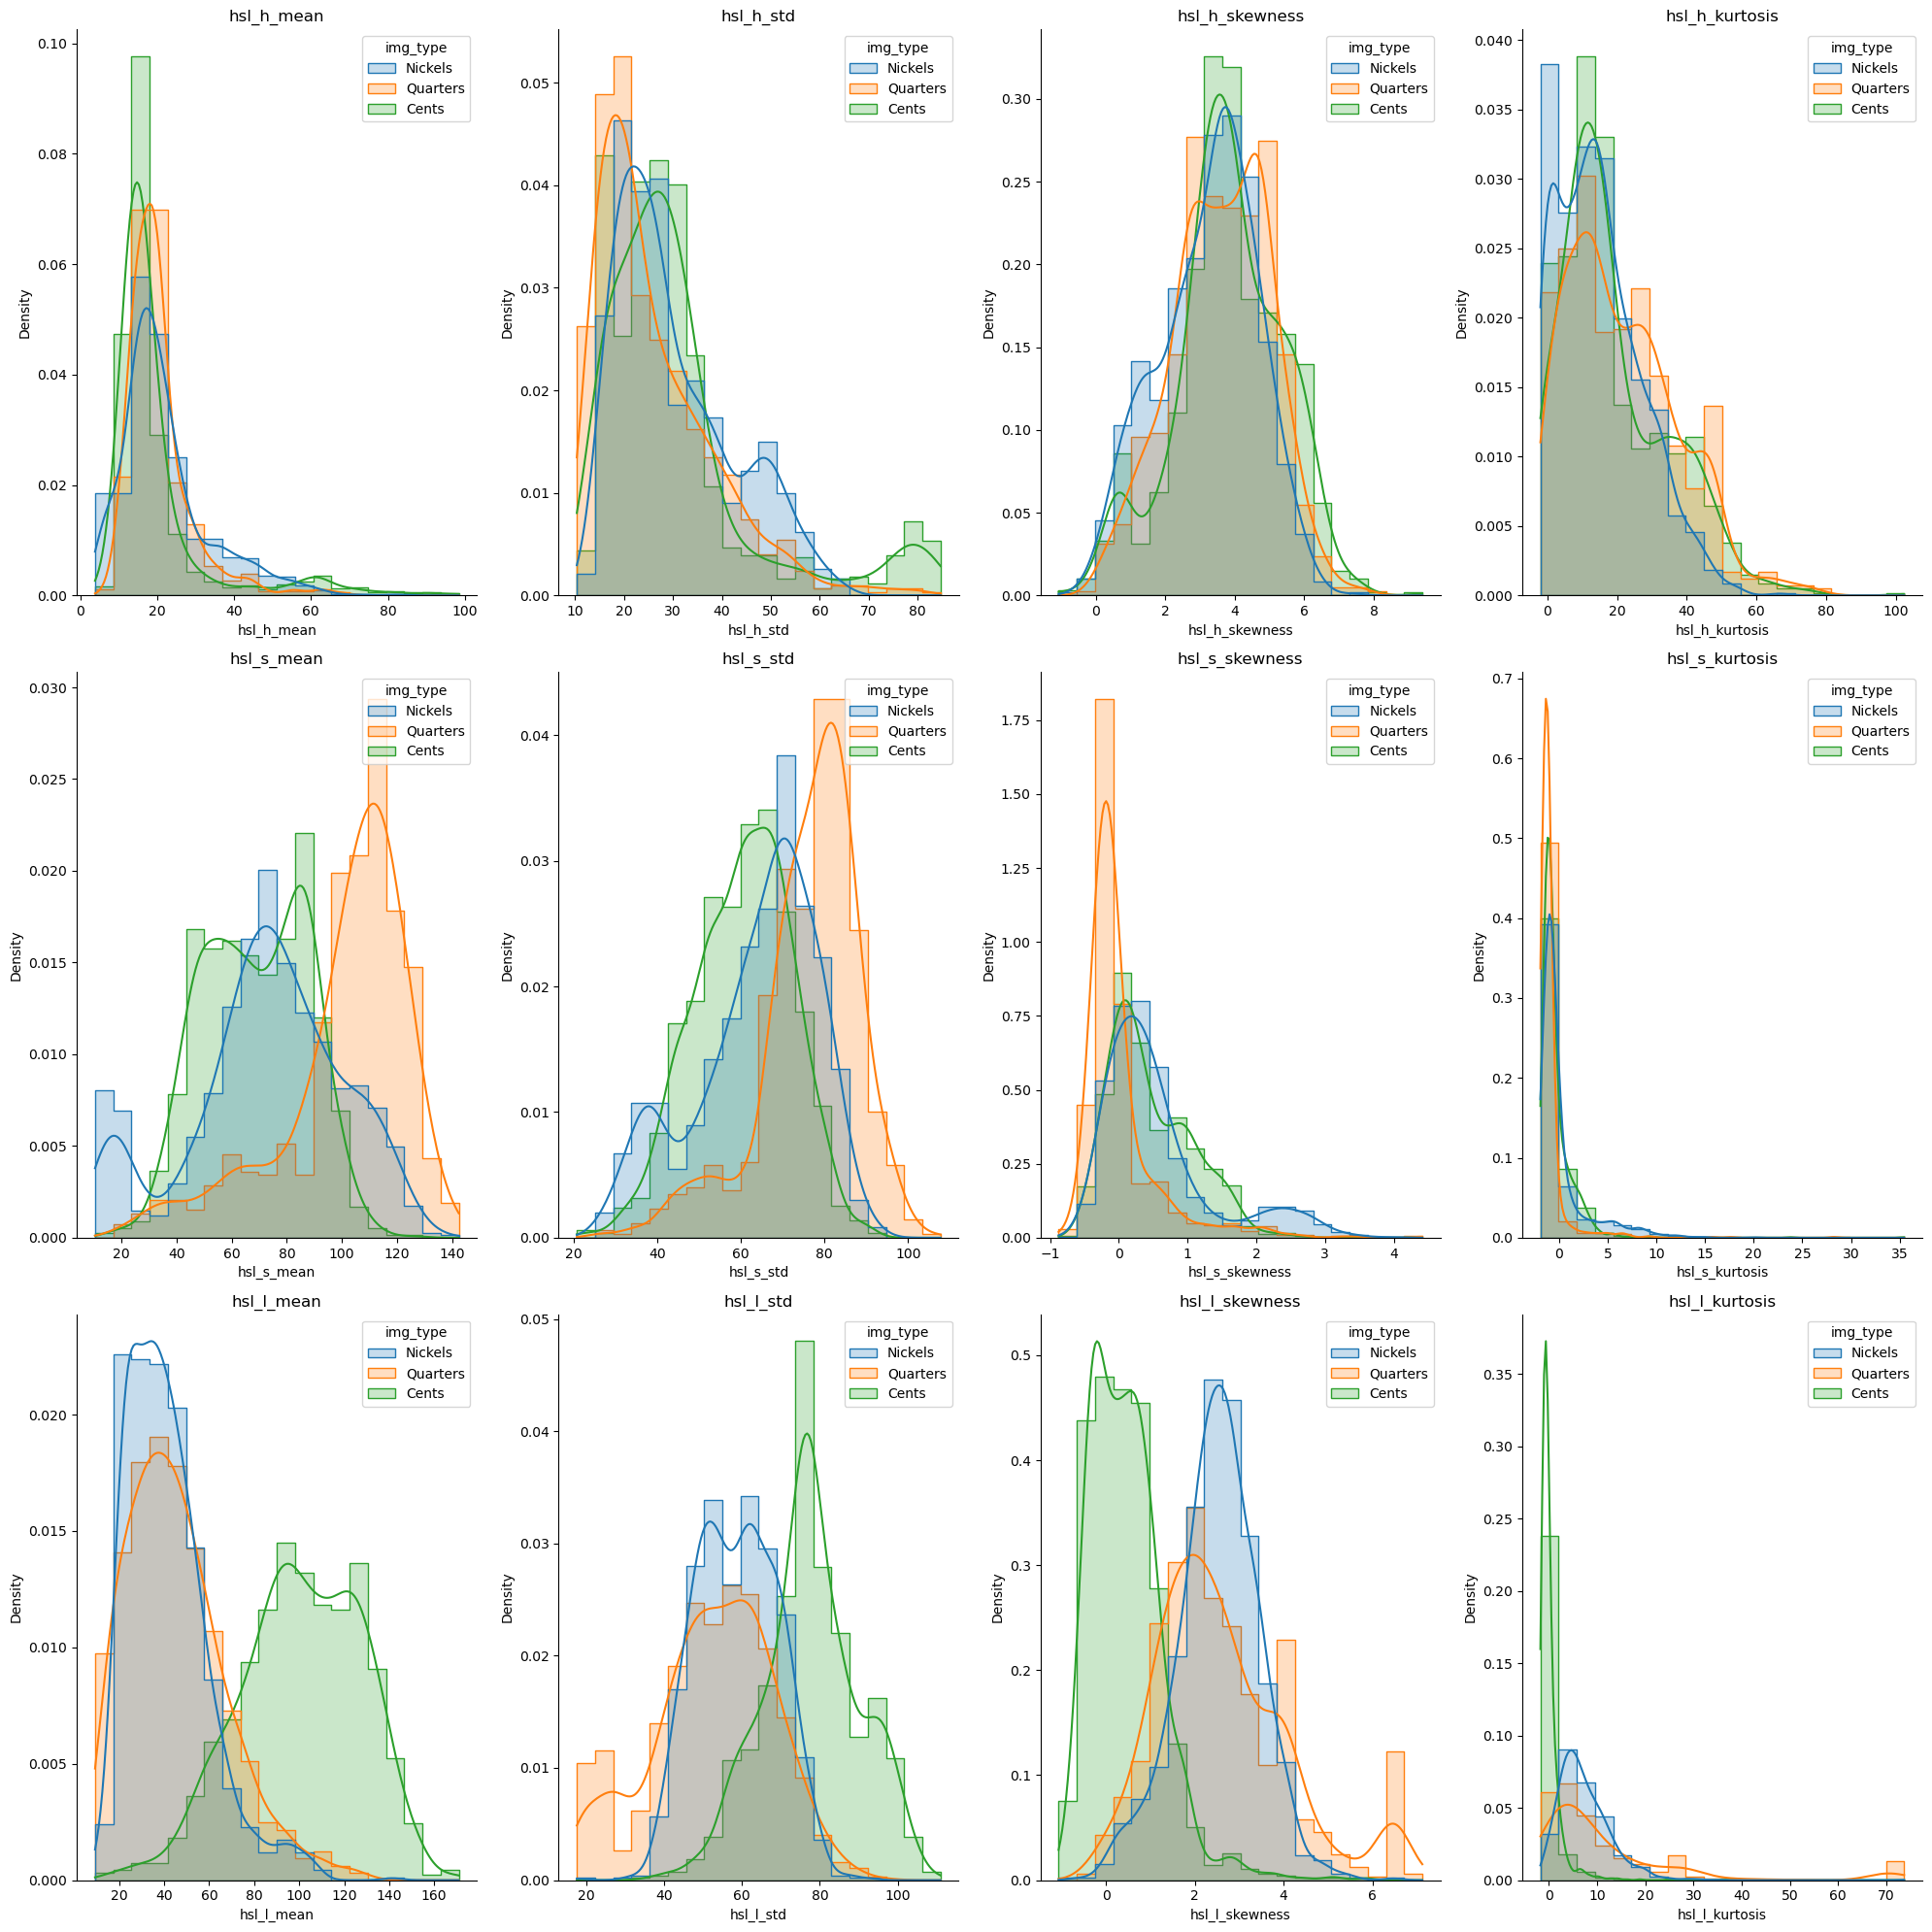

In [80]:
fig, axs = plt.subplots(3, 4, figsize = (20, 20))

feature_names_hls = ['hsl_h_mean', 'hsl_h_std', 'hsl_h_skewness', 'hsl_h_kurtosis',
                     'hsl_s_mean', 'hsl_s_std', 'hsl_s_skewness', 'hsl_s_kurtosis',
                     'hsl_l_mean', 'hsl_l_std', 'hsl_l_skewness', 'hsl_l_kurtosis']

feature_names_lab = ['lab_l_mean', 'lab_l_std', 'lab_l_skewness', 'lab_l_kurtosis',
                     'lab_a_mean', 'lab_a_std', 'lab_a_skewness', 'lab_a_kurtosis',
                     'lab_b_mean', 'lab_b_std', 'lab_b_skewness', 'lab_b_kurtosis']

for i, feature in enumerate(feature_names_hls):
    ax = axs.flatten()[i]
    
    sns.histplot(data = df_hsl_lab_features, x = feature, hue = 'img_type', 
                 element = 'step', stat = 'density', common_norm = False,
                 bins = 20, kde = True, ax = ax)
    
    ax.set_title(feature)    
    ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

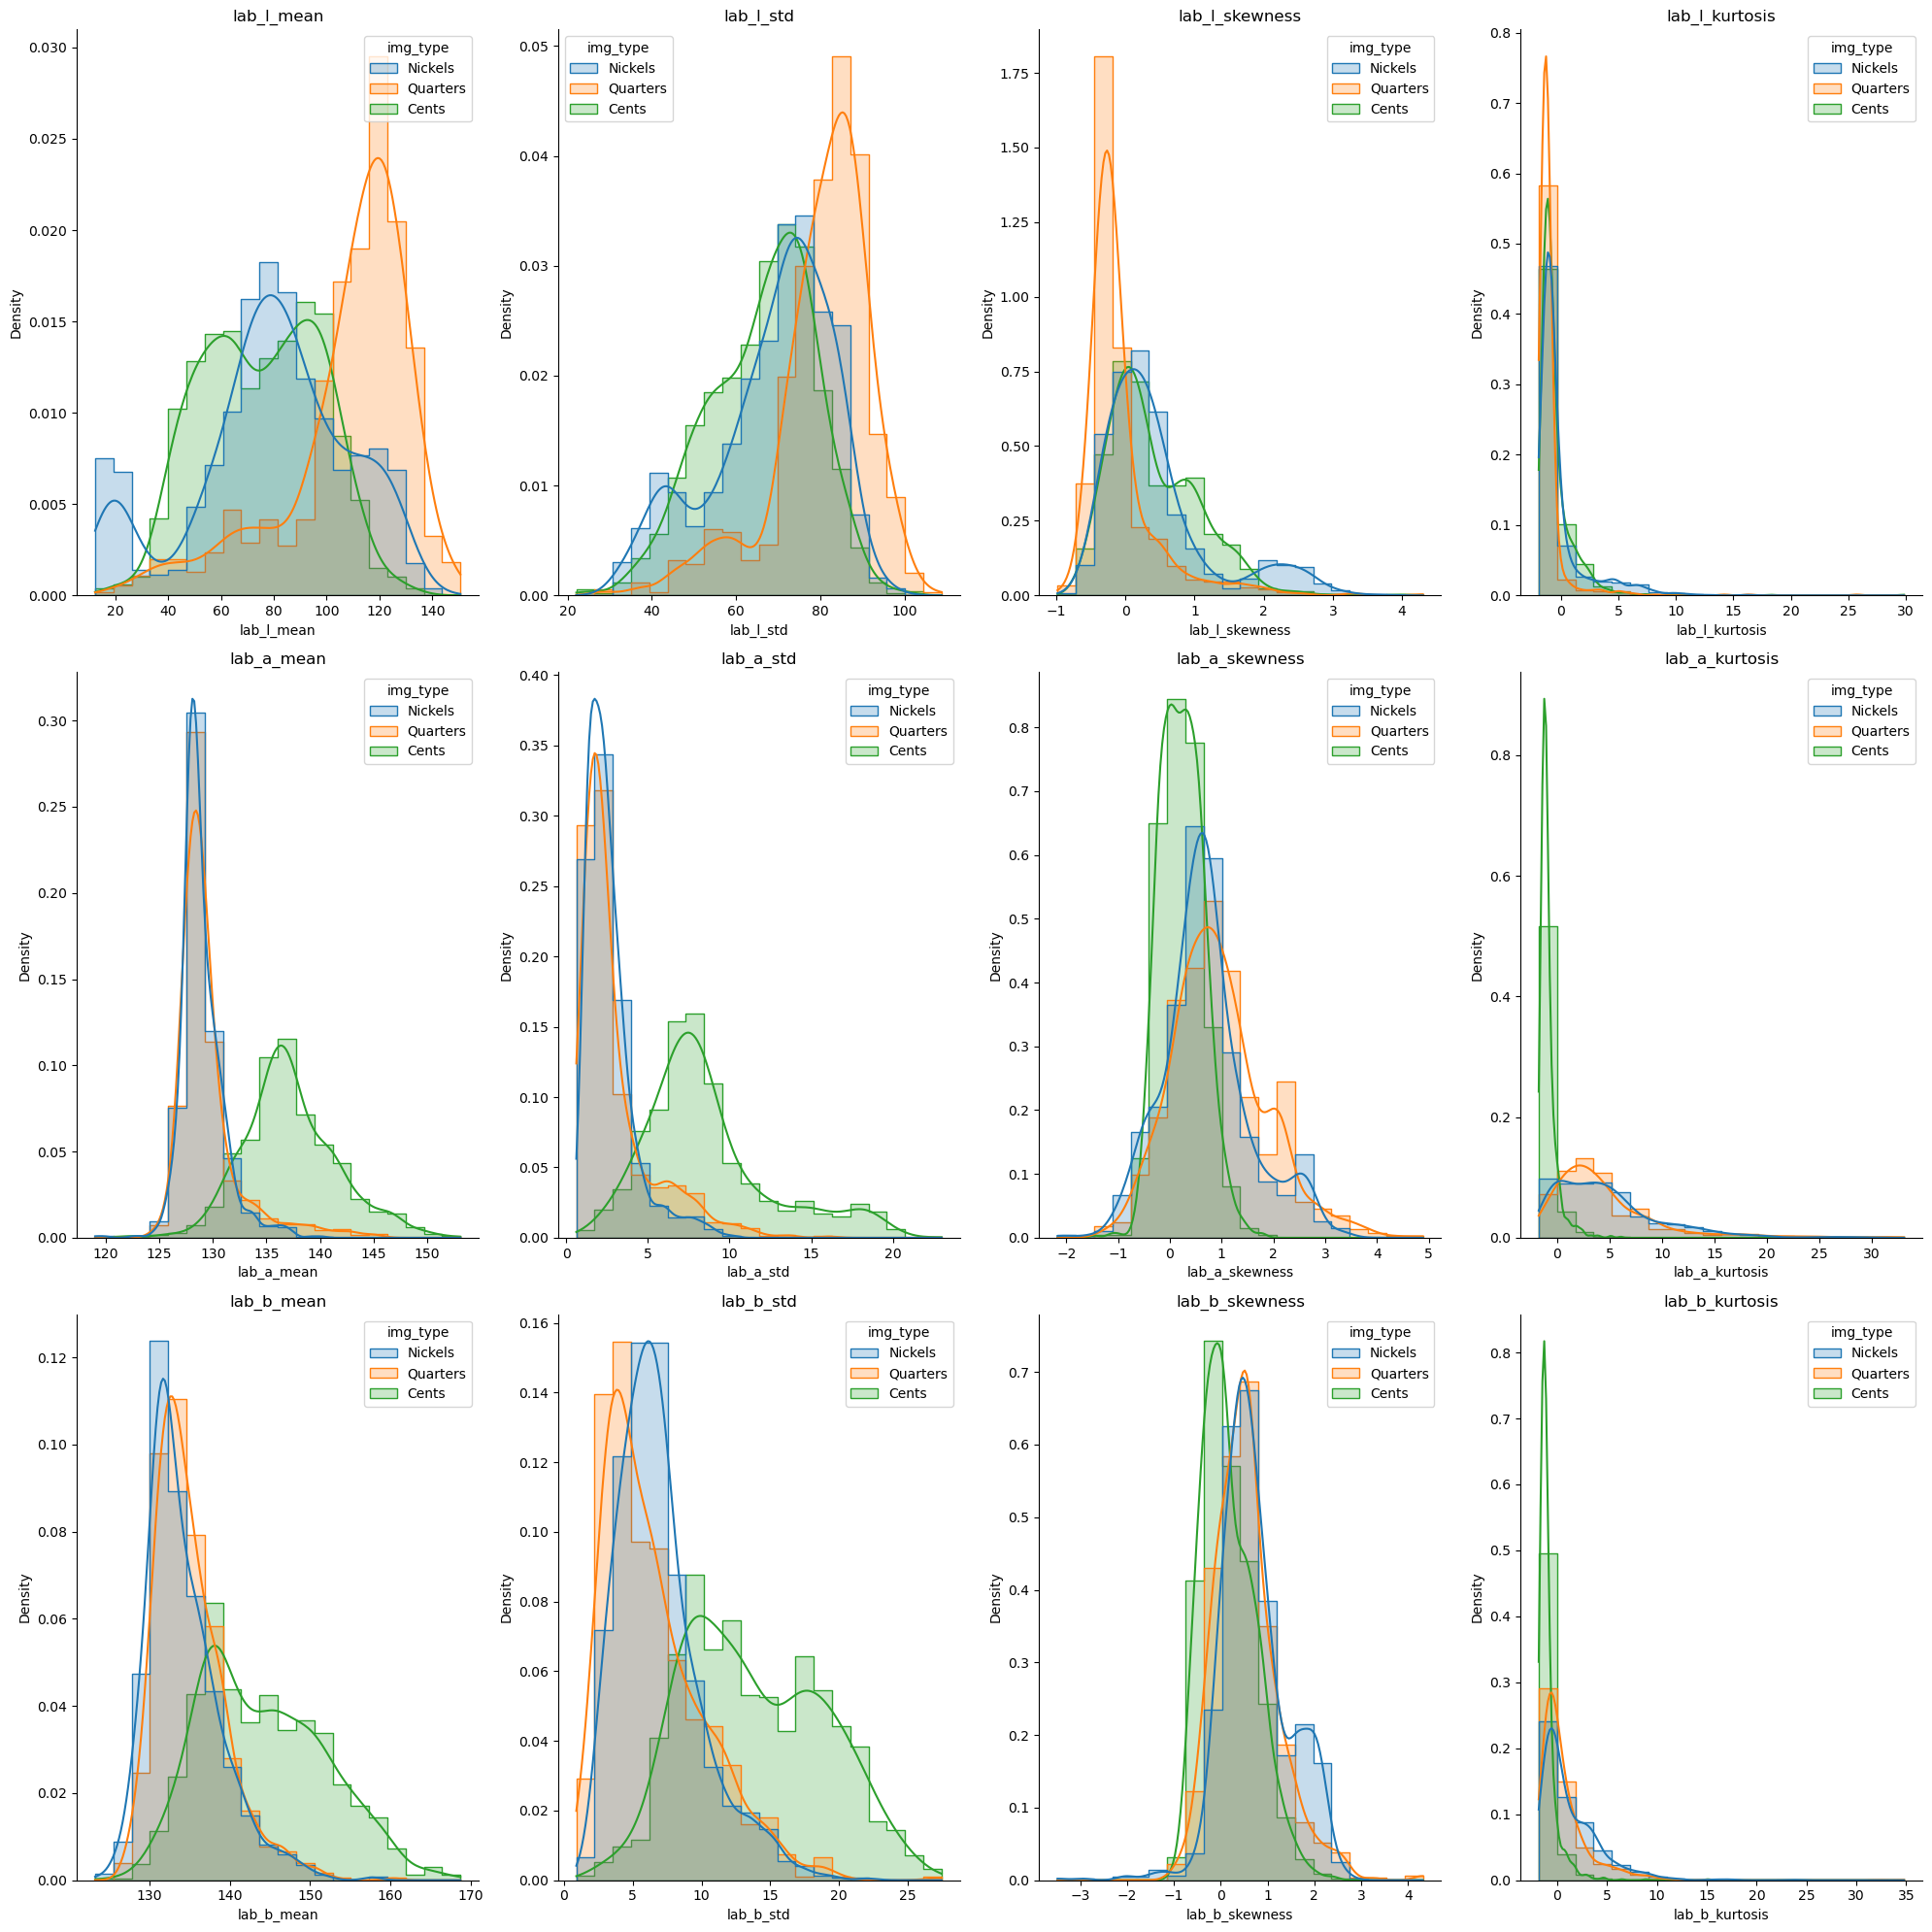

In [81]:
fig, axs = plt.subplots(3, 4, figsize = (20, 20))

for i, feature in enumerate(feature_names_lab):
    ax = axs.flatten()[i]
    
    sns.histplot(data = df_hsl_lab_features, x = feature, hue = 'img_type', 
                 element = 'step', stat = 'density', common_norm = False,
                 bins = 20, kde = True, ax = ax)
    
    ax.set_title(feature)    
    ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

# YCbCr and HSV + YCbCr Space

In [82]:
def extract_color_features_ycbcr_hsv(image):
    ycbcr_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    hsv_ycbcr_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    y_mean, y_std, y_skewness, y_kurtosis = calculate_moments(ycbcr_image[:, :, 0])
    cb_mean, cb_std, cb_skewness, cb_kurtosis = calculate_moments(ycbcr_image[:, :, 1])
    cr_mean, cr_std, cr_skewness, cr_kurtosis = calculate_moments(ycbcr_image[:, :, 2])

    hsv_ycbcr_h_mean, hsv_ycbcr_h_std, hsv_ycbcr_h_skewness, hsv_ycbcr_h_kurtosis = calculate_moments(hsv_ycbcr_image[:, :, 0])
    hsv_ycbcr_s_mean, hsv_ycbcr_s_std, hsv_ycbcr_s_skewness, hsv_ycbcr_s_kurtosis = calculate_moments(hsv_ycbcr_image[:, :, 1])
    hsv_ycbcr_v_mean, hsv_ycbcr_v_std, hsv_ycbcr_v_skewness, hsv_ycbcr_v_kurtosis = calculate_moments(hsv_ycbcr_image[:, :, 2])

    return [y_mean, y_std, y_skewness, y_kurtosis,
            cb_mean, cb_std, cb_skewness, cb_kurtosis,
            cr_mean, cr_std, cr_skewness, cr_kurtosis,
            hsv_ycbcr_h_mean, hsv_ycbcr_h_std, hsv_ycbcr_h_skewness, hsv_ycbcr_h_kurtosis,
            hsv_ycbcr_s_mean, hsv_ycbcr_s_std, hsv_ycbcr_s_skewness, hsv_ycbcr_s_kurtosis,
            hsv_ycbcr_v_mean, hsv_ycbcr_v_std, hsv_ycbcr_v_skewness, hsv_ycbcr_v_kurtosis]

In [83]:
cols_ycbcr_hsv = ['y_mean', 'y_std', 'y_skewness', 'y_kurtosis',
                 'cb_mean', 'cb_std', 'cb_skewness', 'cb_kurtosis',
                 'cr_mean', 'cr_std', 'cr_skewness', 'cr_kurtosis',
                 'hsv_ycbcr_h_mean', 'hsv_ycbcr_h_std', 'hsv_ycbcr_h_skewness', 'hsv_ycbcr_h_kurtosis',
                 'hsv_ycbcr_s_mean', 'hsv_ycbcr_s_std', 'hsv_ycbcr_s_skewness', 'hsv_ycbcr_s_kurtosis',
                 'hsv_ycbcr_v_mean', 'hsv_ycbcr_v_std', 'hsv_ycbcr_v_skewness', 'hsv_ycbcr_v_kurtosis']

In [84]:
c_feats_nickels_ycbcr_hsv = []
for file in tqdm(nickels_cropped_files):
    img = np.asarray(Image.open(file))
    c_feats_nickels_ycbcr_hsv.append(extract_color_features_ycbcr_hsv(img))

color_features_df_nickels_ycbcr_hsv = pd.DataFrame({"img": nickels_cropped_files, "color_features": c_feats_nickels_ycbcr_hsv})
color_features_df_nickels_ycbcr_hsv['img'] = color_features_df_nickels_ycbcr_hsv['img'].apply(lambda x: os.path.basename(x))

nickels_df_ycbcr_hsv = pd.DataFrame(color_features_df_nickels_ycbcr_hsv["color_features"].to_list(), columns = cols_ycbcr_hsv)
nickels_df_ycbcr_hsv['img'] = color_features_df_nickels_ycbcr_hsv['img']
nickels_df_ycbcr_hsv['img_type'] = 'Nickels'

nickels_df_ycbcr_hsv.to_parquet('./processed_dfs/extract_features_color_feats_nickels_ycbcr_hsv.parquet')

100%|██████████| 1133/1133 [02:42<00:00,  6.98it/s]


In [85]:
c_feats_quarters_ycbcr_hsv = []
for file in tqdm(quarters_cropped_files):
    img = np.asarray(Image.open(file))
    c_feats_quarters_ycbcr_hsv.append(extract_color_features_ycbcr_hsv(img))

color_features_df_quarters_ycbcr_hsv = pd.DataFrame({"img": quarters_cropped_files, "color_features": c_feats_quarters_ycbcr_hsv})
color_features_df_quarters_ycbcr_hsv['img'] = color_features_df_quarters_ycbcr_hsv['img'].apply(lambda x: os.path.basename(x))

quarters_df_ycbcr_hsv = pd.DataFrame(color_features_df_quarters_ycbcr_hsv["color_features"].to_list(), columns = cols_ycbcr_hsv)
quarters_df_ycbcr_hsv['img'] = color_features_df_quarters_ycbcr_hsv['img']
quarters_df_ycbcr_hsv['img_type'] = 'Quarters'

quarters_df_ycbcr_hsv.to_parquet('./processed_dfs/extract_features_color_feats_quarters_ycbcr_hsv.parquet')

100%|██████████| 799/799 [02:15<00:00,  5.92it/s]


In [86]:
c_feats_cents_ycbcr_hsv = []
for file in tqdm(cents_cropped_files):
    img = np.asarray(Image.open(file))
    c_feats_cents_ycbcr_hsv.append(extract_color_features_ycbcr_hsv(img))

color_features_df_cents_ycbcr_hsv = pd.DataFrame({"img": cents_cropped_files, "color_features": c_feats_cents_ycbcr_hsv})
color_features_df_cents_ycbcr_hsv['img'] = color_features_df_cents_ycbcr_hsv['img'].apply(lambda x: os.path.basename(x))

cents_df_ycbcr_hsv = pd.DataFrame(color_features_df_cents_ycbcr_hsv["color_features"].to_list(), columns = cols_ycbcr_hsv)
cents_df_ycbcr_hsv['img'] = color_features_df_cents_ycbcr_hsv['img']
cents_df_ycbcr_hsv['img_type'] = 'Cents'

cents_df_ycbcr_hsv.to_parquet('./processed_dfs/extract_features_color_feats_cents_ycbcr_hsv.parquet')

100%|██████████| 1161/1161 [02:09<00:00,  8.93it/s]


In [93]:
df_ycbcr_hsv_features = pd.concat([nickels_df_ycbcr_hsv, quarters_df_ycbcr_hsv, cents_df_ycbcr_hsv], ignore_index = True)
df_ycbcr_hsv_features.shape

(3093, 26)

In [94]:
feature_names_ycbcr = ['y_mean', 'y_std', 'y_skewness', 'y_kurtosis',
                       'cb_mean', 'cb_std', 'cb_skewness', 'cb_kurtosis',
                       'cr_mean', 'cr_std', 'cr_skewness', 'cr_kurtosis']

feature_names_ycbcr_and_hsv = ['hsv_ycbcr_h_mean', 'hsv_ycbcr_h_std', 'hsv_ycbcr_h_skewness', 'hsv_ycbcr_h_kurtosis',
                               'hsv_ycbcr_s_mean', 'hsv_ycbcr_s_std', 'hsv_ycbcr_s_skewness', 'hsv_ycbcr_s_kurtosis',
                               'hsv_ycbcr_v_mean', 'hsv_ycbcr_v_std', 'hsv_ycbcr_v_skewness', 'hsv_ycbcr_v_kurtosis']

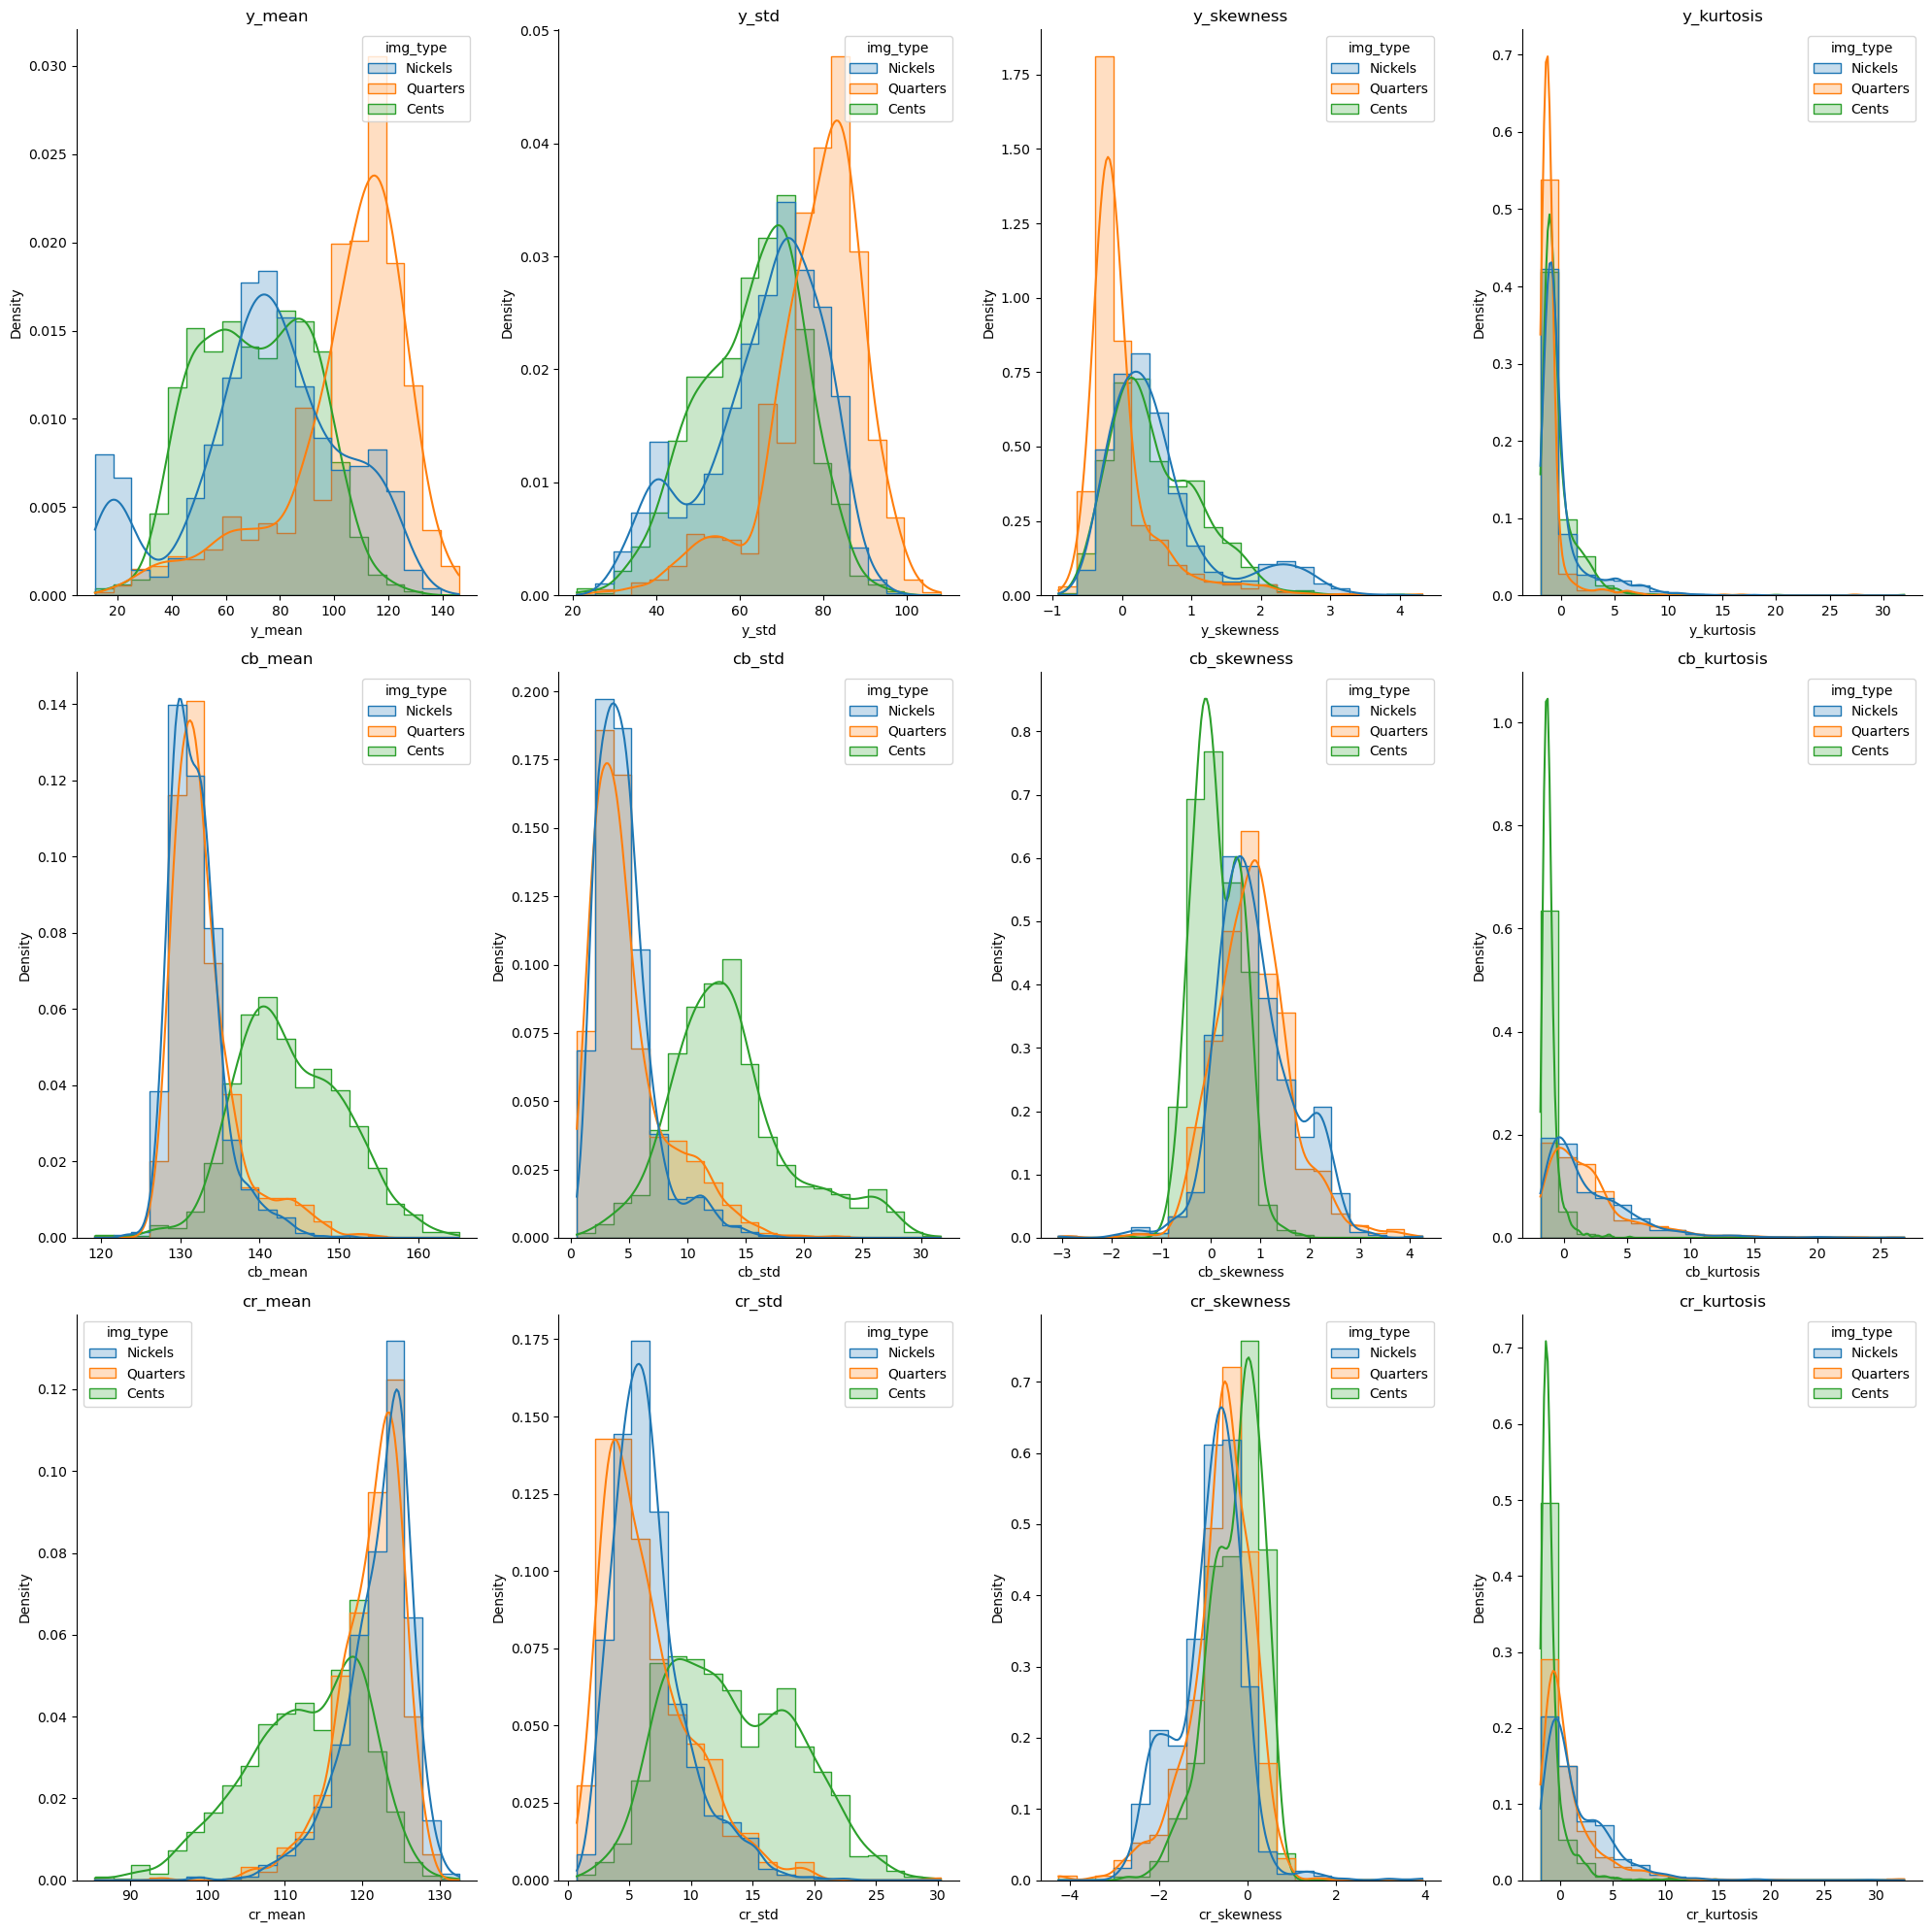

In [95]:
fig, axs = plt.subplots(3, 4, figsize = (20, 20))

for i, feature in enumerate(feature_names_ycbcr):
    ax = axs.flatten()[i]
    
    sns.histplot(data = df_ycbcr_hsv_features, x = feature, hue = 'img_type', 
                 element = 'step', stat = 'density', common_norm = False,
                 bins = 20, kde = True, ax = ax)
    
    ax.set_title(feature)    
    ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

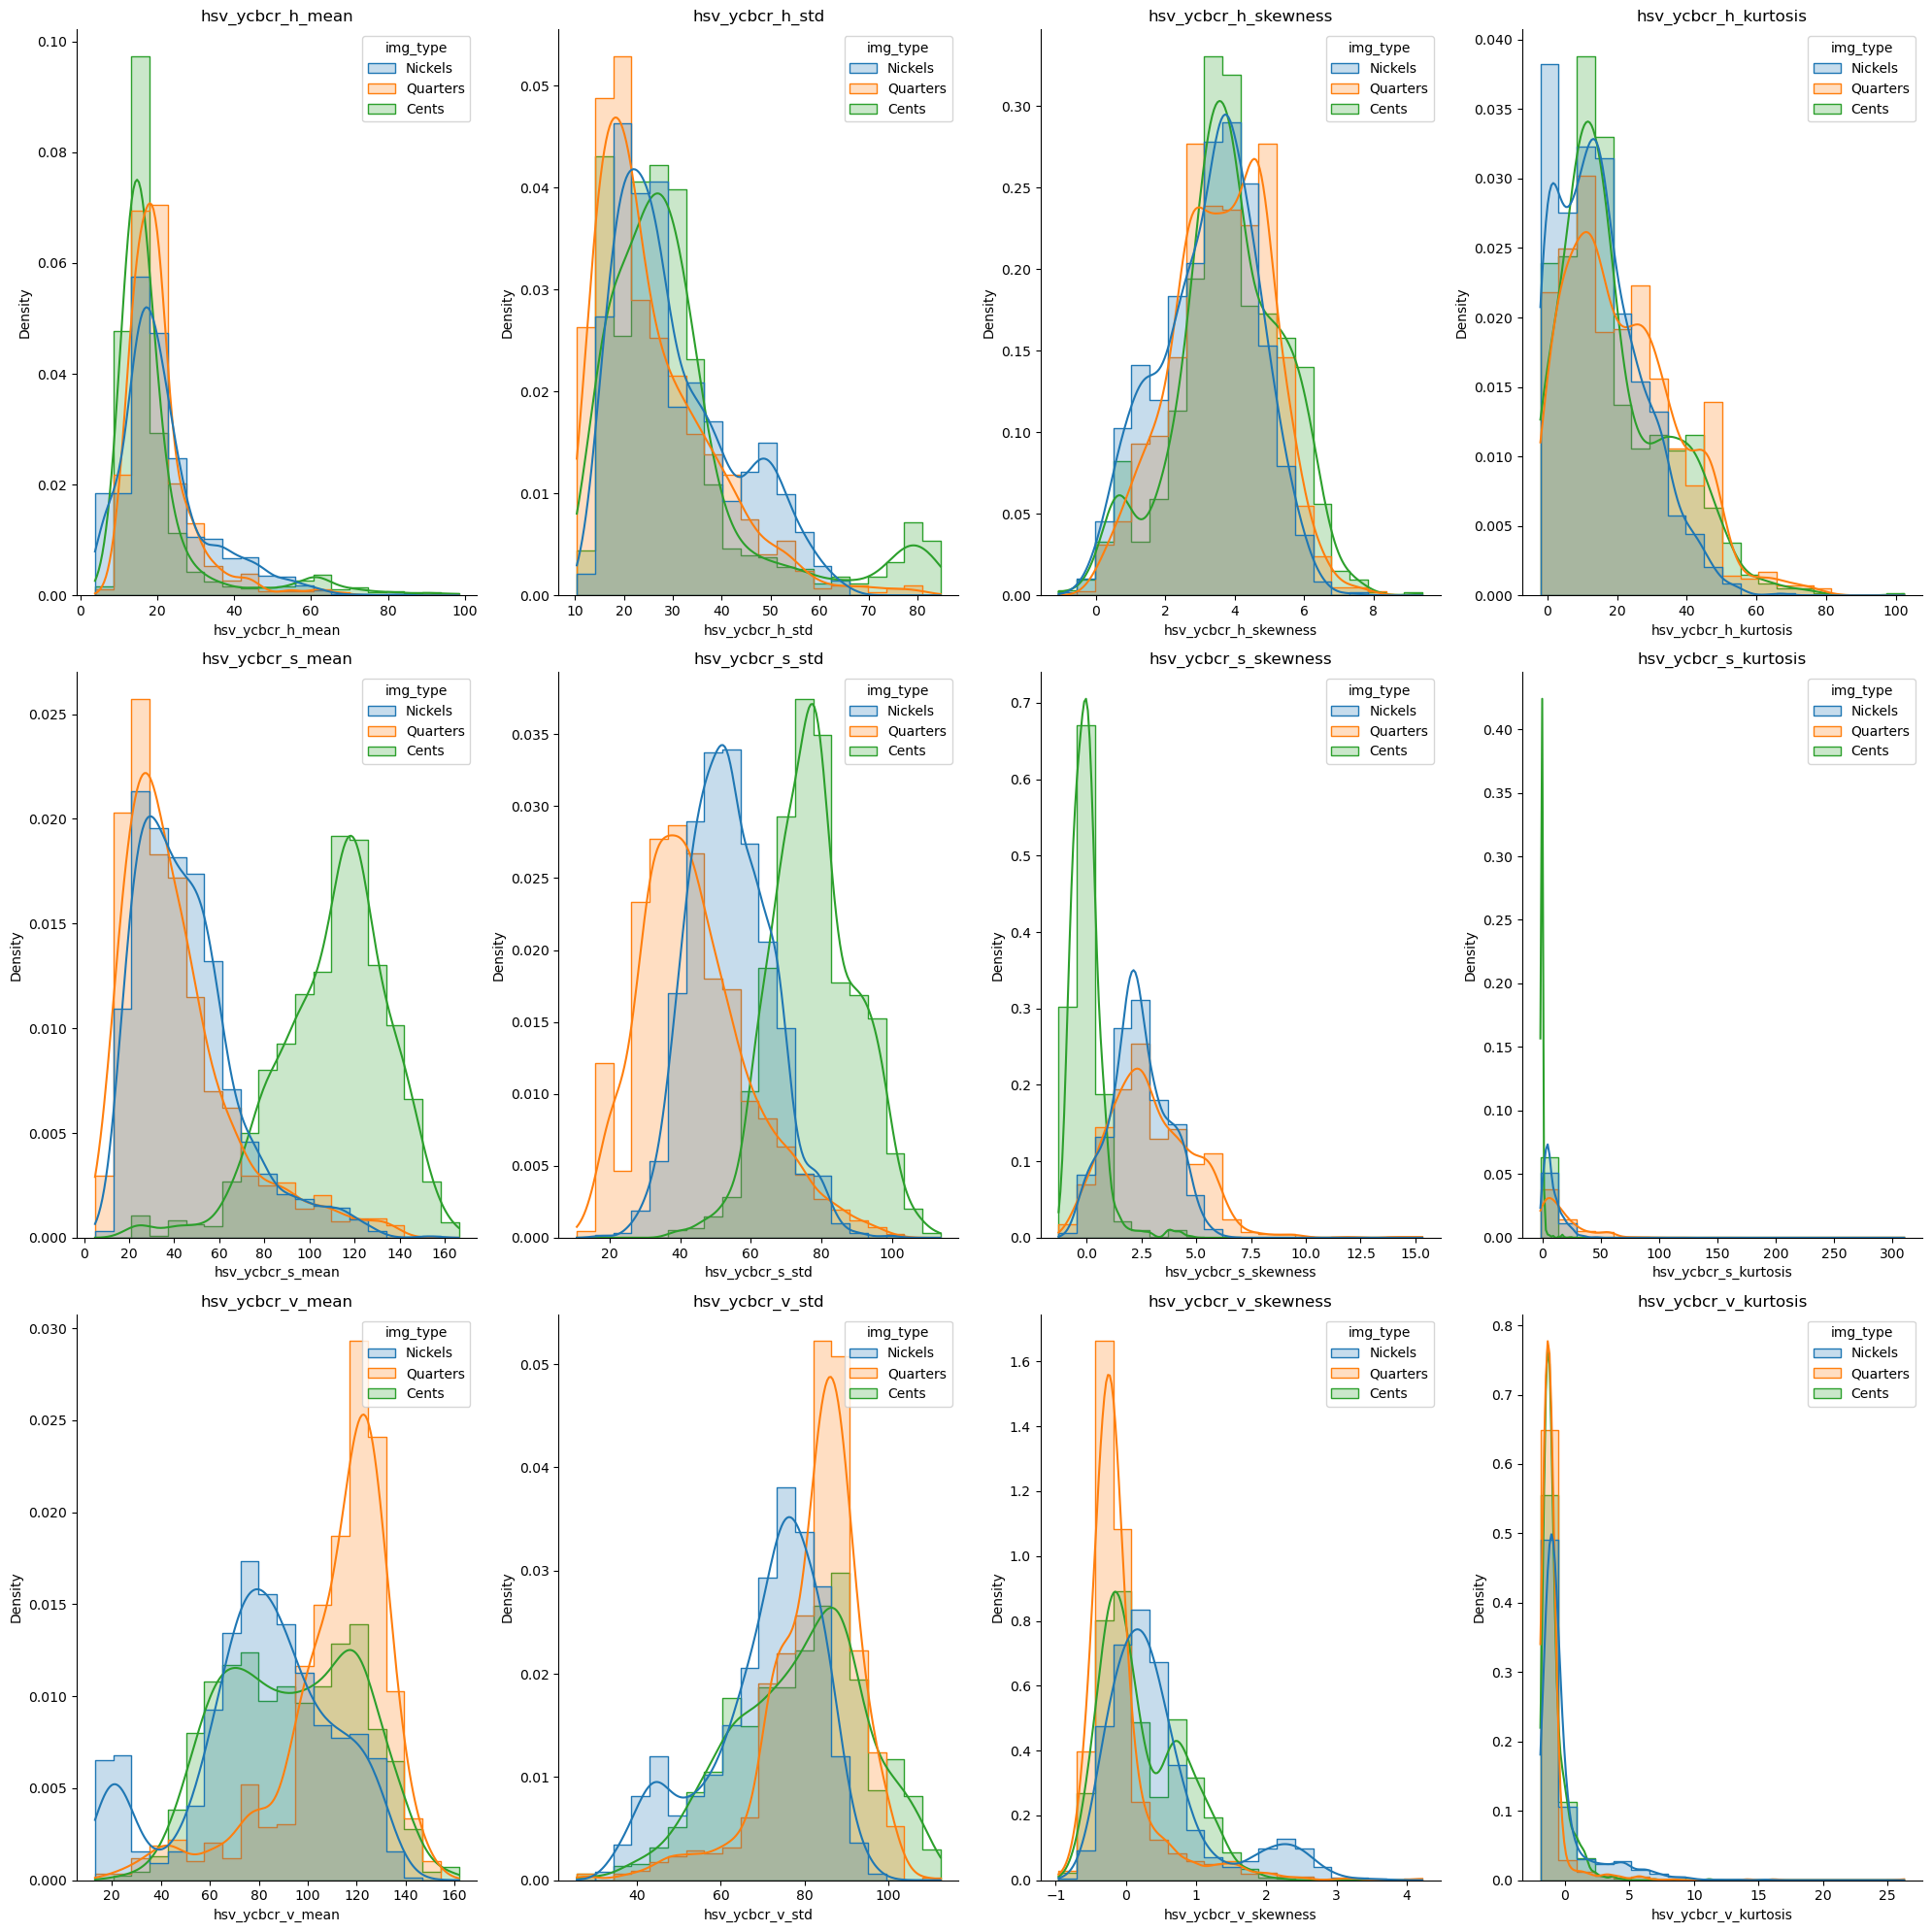

In [96]:
fig, axs = plt.subplots(3, 4, figsize = (20, 20))

for i, feature in enumerate(feature_names_ycbcr_and_hsv):
    ax = axs.flatten()[i]
    
    sns.histplot(data = df_ycbcr_hsv_features, x = feature, hue = 'img_type', 
                 element = 'step', stat = 'density', common_norm = False,
                 bins = 20, kde = True, ax = ax)
    
    ax.set_title(feature)    
    ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()